### Using cosmos repeats to define color cut

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from tools import *

### LRG

The color cuts we are looking at:

        lrg &= zmag - w1mag > 0.8 * (rmag-zmag) - 0.6    # non-stellar cut.
        lrg &= (
            ((gmag - w1mag > 2.6) & (gmag - rmag > 1.4))
            | (rmag - w1mag > 1.8)                       # low-z cut.
        )
        lrg &= rmag - zmag > (zmag - 16.83) * 0.45       # double sliding cut 1.
        lrg &= rmag - zmag > (zmag - 13.80) * 0.19       # double sliding cut 2.
        lrg &= zfibermag < 21.5 

cut 1:
zmag - w1mag - 0.8*(rmag-zmag) + 0.6 > 0

In [5]:
topdir = '/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/obiwan_out/cosmos_subsets/cosmos_all_stacked/'


average missing lrgs in set 0:0.1
set 0 average scatter:0.001716
average missing lrgs in set 1:0.1
set 1 average scatter:0.001036
average missing lrgs in set 2:0.1
set 2 average scatter:0.002900
average missing lrgs in set 3:0.1
set 3 average scatter:0.001389


/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)


average missing lrgs in set 4:0.1
set 4 average scatter:0.000214


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in less


average missing lrgs in set 5:0.1
set 5 average scatter:0.003327
average missing lrgs in set 6:2.0
set 6 average scatter:0.002364
average missing lrgs in set 7:0.0
set 7 average scatter:0.004357
average missing lrgs in set 8:0.0
set 8 average scatter:0.001954
average missing lrgs in set 9:0.0
set 9 average scatter:0.003577


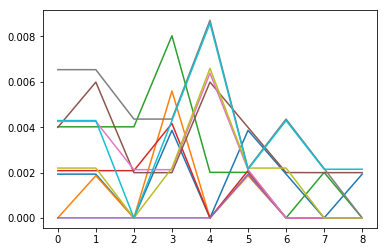

In [55]:
#lrgs on one set but not on the other set
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut1_list = []
    missing_lrgs = 0
    for i in range(10):
        if i==n:
            continue
        sel_lrg = dat['set_%d_islrg'%n]&dat['set_%d_matched'%i]
        sel_missing_lrg = dat['set_%d_islrg'%n]&~dat['set_%d_matched'%i]
        missing_lrgs += sel_missing_lrg.sum()
        zmag = flux2mag(dat[sel_lrg]['set_%d_flux_z'%i],dat[sel_lrg]['MW_TRANSMISSION_Z'])
        w1mag = flux2mag(dat[sel_lrg]['set_%d_flux_w1'%i],dat[sel_lrg]['MW_TRANSMISSION_W1'])
        rmag = flux2mag(dat[sel_lrg]['set_%d_flux_r'%i],dat[sel_lrg]['MW_TRANSMISSION_R'])
        cut1 = zmag - w1mag - 0.8*(rmag-zmag) + 0.6
        cut1_list.append(cut1)
    missing_lrgs = missing_lrgs/9.
    print("average missing lrgs in set %d:%.1f"%(n,missing_lrgs))
    ratio = []
    for i in range(9):
        num = (cut1_list[i]<0).sum()/len(cut1_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

#### scatter on this side is low

##### cut2: gmag - w1mag -2.6 > 0  | (rmag - w1mag > 1.8)
---scatter is gmag - w1mag -2.6 <0 & (rmag - w1mag -1.8 < 0)

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less


set 0 average scatter:0.001559
set 1 average scatter:0.001576
set 2 average scatter:0.003738
set 3 average scatter:0.002225
set 4 average scatter:0.002890
set 5 average scatter:0.002234
set 6 average scatter:0.000844
set 7 average scatter:0.001996
set 8 average scatter:0.000842
set 9 average scatter:0.001086


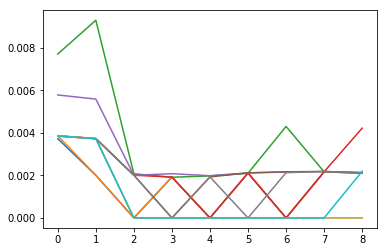

In [58]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut2_list = []
    cut2_assist_list = []
    for i in range(10):
        if i==n:
            continue
        sel_lrg = dat['set_%d_islrg'%i]&dat['set_%d_matched'%i]
        rmag = flux2mag(dat[sel_lrg]['flux_r'],dat[sel_lrg]['MW_TRANSMISSION_G'])
        gmag = flux2mag(dat[sel_lrg]['flux_g'],dat[sel_lrg]['MW_TRANSMISSION_G'])
        w1mag = flux2mag(dat[sel_lrg]['flux_w1'],dat[sel_lrg]['MW_TRANSMISSION_W1'])
        cut2 = gmag - w1mag - 2.6
        cut2_assist = rmag - w1mag - 1.8
        cut2_list.append(cut2)
        cut2_assist_list.append(cut2_assist)

    ratio = []
    for i in range(9):
        num = ((cut2_list[i]<0)&(cut2_assist_list[i]<0)).sum()/len(cut2_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

#### cut 2 is also having a low scatter

cut 3 : gmag - rmag -1.4 > 0 | (rmag - w1mag > 1.8) \
same, we have scatter as : (gmag - rmag -1.4 < 0)&(rmag - w1mag - 1.8 <0 )

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less


set 0 average scatter:0.000667
set 1 average scatter:0.000660
set 2 average scatter:0.003095
set 3 average scatter:0.001078
set 4 average scatter:0.000842
set 5 average scatter:0.002479
set 6 average scatter:0.002695
set 7 average scatter:0.001311
set 8 average scatter:0.000849
set 9 average scatter:0.001323


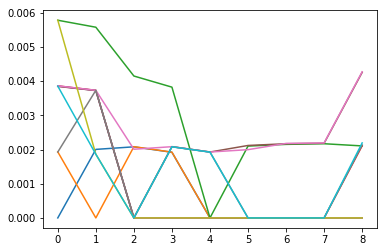

In [59]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut3_list = []
    cut3_assist_list = []
    for i in range(10):
        if i==n:
            continue
        sel_lrg = dat['set_%d_islrg'%i]&dat['set_%d_matched'%i]
        gmag = flux2mag(dat[sel_lrg]['flux_g'],dat[sel_lrg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_lrg]['flux_r'],dat[sel_lrg]['MW_TRANSMISSION_R'])
        w1mag = flux2mag(dat[sel_lrg]['flux_w1'],dat[sel_lrg]['MW_TRANSMISSION_W1'])
        cut3 = gmag - rmag - 1.4 
        cut3_assist = rmag - w1mag - 1.8
        cut3_list.append(cut3)
        cut3_assist_list.append(cut3_assist)

    ratio = []
    for i in range(9):
        num = ((cut3_list[i]<0)&(cut3_assist_list[i]<0)).sum()/len(cut3_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

cut 4:  rmag - zmag - (zmag - 16.83) * 0.45 > 0

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)


set 0 average scatter:0.141928
set 1 average scatter:0.118365
set 2 average scatter:0.141078
set 3 average scatter:0.148496


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less


set 4 average scatter:0.129397
set 5 average scatter:0.138281
set 6 average scatter:0.162591
set 7 average scatter:0.148418
set 8 average scatter:0.134007
set 9 average scatter:0.139598


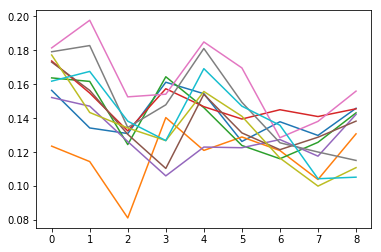

In [64]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut4_list = []
    for i in range(10):
        if i==n:
            continue
        sel_lrg = dat['set_%d_islrg'%i]&dat['set_%d_matched'%i]
        gmag = flux2mag(dat[sel_lrg]['flux_g'],dat[sel_lrg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_lrg]['flux_r'],dat[sel_lrg]['MW_TRANSMISSION_R'])
        zmag = flux2mag(dat[sel_lrg]['flux_z'],dat[sel_lrg]['MW_TRANSMISSION_Z'])
    
        cut4 = rmag - zmag - (zmag - 16.83) * 0.45
        cut4_list.append(cut4)

    ratio = []
    for i in range(9):
        num = (cut4_list[i]<0).sum()/len(cut4_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

cut 5: rmag - zmag - (zmag - 13.80) * 0.19 > 0\
double sliding cut 2.

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)


set 0 average scatter:0.018120
set 1 average scatter:0.020920
set 2 average scatter:0.029186
set 3 average scatter:0.033526


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less


set 4 average scatter:0.020722
set 5 average scatter:0.027322
set 6 average scatter:0.034375
set 7 average scatter:0.044618
set 8 average scatter:0.043934
set 9 average scatter:0.049374


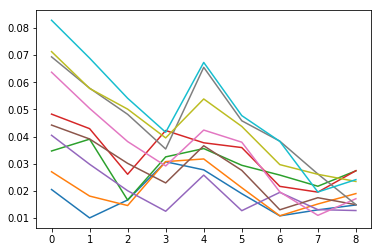

In [65]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut5_list = []
    for i in range(10):
        if i==n:
            continue
        sel_lrg = dat['set_%d_islrg'%i]&dat['set_%d_matched'%i]
        gmag = flux2mag(dat[sel_lrg]['flux_g'],dat[sel_lrg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_lrg]['flux_r'],dat[sel_lrg]['MW_TRANSMISSION_R'])
        zmag = flux2mag(dat[sel_lrg]['flux_z'],dat[sel_lrg]['MW_TRANSMISSION_Z'])
    
        cut5 =rmag - zmag - (zmag - 13.80) * 0.19
        cut5_list.append(cut5)

    ratio = []
    for i in range(9):
        num = (cut5_list[i]<0).sum()/len(cut5_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

cut6: zfibermag - 21.5 < 0

set 0 average scatter:0.042329
set 1 average scatter:0.031972
set 2 average scatter:0.035737
set 3 average scatter:0.039053


/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: divide by zero encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)


set 4 average scatter:0.035414
set 5 average scatter:0.034200
set 6 average scatter:0.039274
set 7 average scatter:0.046479
set 8 average scatter:0.071945
set 9 average scatter:0.066906


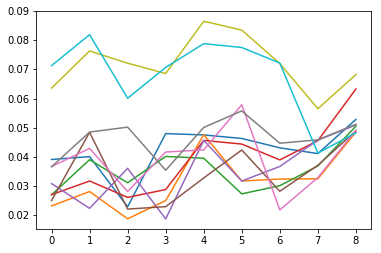

In [66]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut5_list = []
    for i in range(10):
        if i==n:
            continue
        sel_lrg = dat['set_%d_islrg'%i]&dat['set_%d_matched'%i]
        zfibermag = flux2mag(dat[sel_lrg]['FIBERFLUX_Z'],dat[sel_lrg]['MW_TRANSMISSION_Z'])
    
        cut5 = zfibermag - 21.5
        cut5_list.append(cut5)

    ratio = []
    for i in range(9):
        num = (cut5_list[i]>0).sum()/len(cut5_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

### ELG

cuts we are looking at:\
// ADM cuts shared by the northern and southern selections.\
elg &= g > 20                       # bright cut.\
elg &= r - z > 0.3                  # blue cut.\
elg &= r - z < 1.6                  # red cut.\
    elg &= g - r < -1.2*(r - z) + 1.6   # OII flux cut.\

// ADM cuts that are unique to the north or south.
if south:
    elg &= g < 23.4  # faint cut.\
    # ADM south has the FDR cut to remove stars and low-z galaxies.\
    elg &= g - r < 1.15*(r - z) - 0.15\

cut1: g-20>0

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)


average missing elgs in set 0:88.9/1847
set 0 average scatter:0.000000


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in less


average missing elgs in set 1:93.6/1835
set 1 average scatter:0.000000
average missing elgs in set 2:97.9/1820
set 2 average scatter:0.000000
average missing elgs in set 3:91.6/1865
set 3 average scatter:0.000000
average missing elgs in set 4:121.0/1999
set 4 average scatter:0.000191
average missing elgs in set 5:114.3/1914
set 5 average scatter:0.000377
average missing elgs in set 6:130.7/1821
set 6 average scatter:0.000063
average missing elgs in set 7:124.9/1860
set 7 average scatter:0.000379
average missing elgs in set 8:192.4/2112
set 8 average scatter:0.000561
average missing elgs in set 9:159.8/1947
set 9 average scatter:0.000438


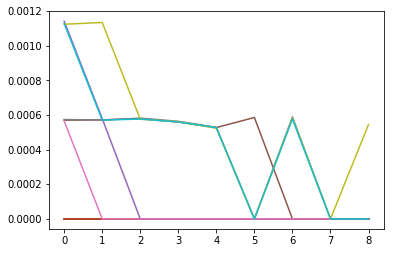

In [74]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut1_list = []
    missing_elg=0
    for i in range(10):
        if i==n:
            continue
        sel_elg = dat['set_%d_iselg'%i]&dat['set_%d_matched'%i]
        sel_missing_elg = dat['set_%d_iselg'%n]&~dat['set_%d_matched'%i]
        missing_elg += sel_missing_elg.sum()
        gmag = flux2mag(dat[sel_elg]['flux_g'],dat[sel_elg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_elg]['flux_r'],dat[sel_elg]['MW_TRANSMISSION_R'])
        zmag = flux2mag(dat[sel_elg]['flux_z'],dat[sel_elg]['MW_TRANSMISSION_Z'])
    
        cut1 = gmag-20
        cut1_list.append(cut1)
    missing_elg = missing_elg/9.
    print("average missing elgs in set %d:%.1f/%d"%(n,missing_elg,dat['set_%d_iselg'%n].sum()))
    ratio = []
    for i in range(9):
        num = (cut1_list[i]<0).sum()/len(cut1_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

cut2: r - z - 0.3 > 0

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less


set 0 average scatter:0.201462
set 1 average scatter:0.196915
set 2 average scatter:0.196330
set 3 average scatter:0.214613
set 4 average scatter:0.194005
set 5 average scatter:0.198855
set 6 average scatter:0.203352
set 7 average scatter:0.195882
set 8 average scatter:0.191664
set 9 average scatter:0.194308


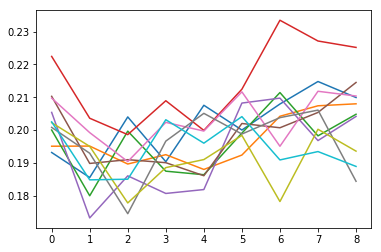

In [77]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut2_list = []
    missing_elg=0
    for i in range(10):
        if i==n:
            continue
        sel_elg = dat['set_%d_iselg'%i]&dat['set_%d_matched'%i]
        gmag = flux2mag(dat[sel_elg]['flux_g'],dat[sel_elg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_elg]['flux_r'],dat[sel_elg]['MW_TRANSMISSION_R'])
        zmag = flux2mag(dat[sel_elg]['flux_z'],dat[sel_elg]['MW_TRANSMISSION_Z'])
    
        cut2 = rmag - zmag -0.3
        cut2_list.append(cut2)
    ratio = []
    for i in range(9):
        num = (cut2_list[i]<0).sum()/len(cut2_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

cut 3: r - z -1.6 < 0

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater


set 0 average scatter:0.006720
set 1 average scatter:0.004661
set 2 average scatter:0.004649
set 3 average scatter:0.002931
set 4 average scatter:0.005001
set 5 average scatter:0.005528
set 6 average scatter:0.006488
set 7 average scatter:0.008287
set 8 average scatter:0.005989
set 9 average scatter:0.007925


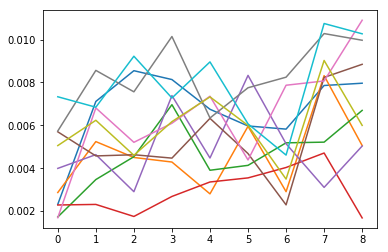

In [80]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut3_list = []
    missing_elg=0
    for i in range(10):
        if i==n:
            continue
        sel_elg = dat['set_%d_iselg'%i]&dat['set_%d_matched'%i]
        gmag = flux2mag(dat[sel_elg]['flux_g'],dat[sel_elg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_elg]['flux_r'],dat[sel_elg]['MW_TRANSMISSION_R'])
        zmag = flux2mag(dat[sel_elg]['flux_z'],dat[sel_elg]['MW_TRANSMISSION_Z'])
    
        cut3 = rmag - zmag - 1.6
        cut3_list.append(cut3)
    ratio = []
    for i in range(9):
        num = (cut3_list[i]>0).sum()/len(cut3_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

cut4: g - r + 1.2*(r - z) -1.6  < 0

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater


set 0 average scatter:0.129658
set 1 average scatter:0.133795
set 2 average scatter:0.135966
set 3 average scatter:0.127580
set 4 average scatter:0.128487
set 5 average scatter:0.132381
set 6 average scatter:0.134398
set 7 average scatter:0.141154
set 8 average scatter:0.138221
set 9 average scatter:0.142148


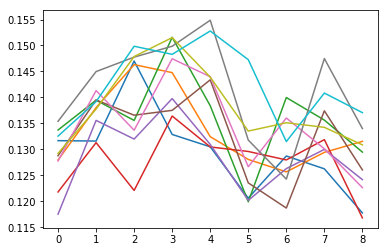

In [81]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut4_list = []
    missing_elg=0
    for i in range(10):
        if i==n:
            continue
        sel_elg = dat['set_%d_iselg'%i]&dat['set_%d_matched'%i]
        gmag = flux2mag(dat[sel_elg]['flux_g'],dat[sel_elg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_elg]['flux_r'],dat[sel_elg]['MW_TRANSMISSION_R'])
        zmag = flux2mag(dat[sel_elg]['flux_z'],dat[sel_elg]['MW_TRANSMISSION_Z'])
    
        cut4 = gmag - rmag +1.2*(rmag - zmag) -1.6
        cut4_list.append(cut4)
    ratio = []
    for i in range(9):
        num = (cut4_list[i]>0).sum()/len(cut4_list[i])
        ratio.append(num)
    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

cut 5: g -23.4 < 0

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater


set 0 average scatter:0.273496
set 1 average scatter:0.267806
set 2 average scatter:0.271666
set 3 average scatter:0.258682
set 4 average scatter:0.249752
set 5 average scatter:0.261290
set 6 average scatter:0.274419
set 7 average scatter:0.274395
set 8 average scatter:0.260883
set 9 average scatter:0.268158


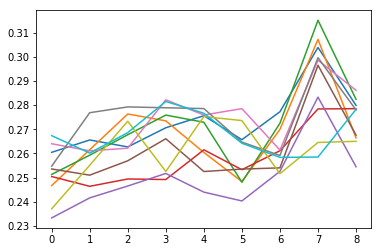

In [85]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut5_list = []
    missing_elg=0
    for i in range(10):
        if i==n:
            continue
        sel_elg = dat['set_%d_iselg'%i]&dat['set_%d_matched'%i]
        gmag = flux2mag(dat[sel_elg]['flux_g'],dat[sel_elg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_elg]['flux_r'],dat[sel_elg]['MW_TRANSMISSION_R'])
        zmag = flux2mag(dat[sel_elg]['flux_z'],dat[sel_elg]['MW_TRANSMISSION_Z'])
    
        cut5 = gmag - 23.4
        cut5_list.append(cut5)
    ratio = []
    for i in range(9):
        num = (cut5_list[i]>0).sum()/len(cut5_list[i])
        ratio.append(num)

    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))

cut 6 : g - r - 1.15*(r - z) + 0.15 < 0

/global/cscratch1/sd/huikong/Obiwan/dr9_LRG/notebooks/tools.py:9: RuntimeWarning: invalid value encountered in log10
  mag= 22.5 - 2.5 * np.log10(flux / mwtransmission)
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater


set 0 average scatter:0.366394
set 1 average scatter:0.364010
set 2 average scatter:0.365854
set 3 average scatter:0.382661
set 4 average scatter:0.350450
set 5 average scatter:0.354151
set 6 average scatter:0.372383
set 7 average scatter:0.364302
set 8 average scatter:0.347287
set 9 average scatter:0.352269


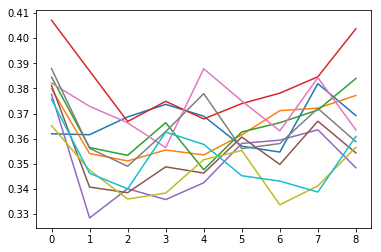

In [86]:
for n in range(10):
    dat = fits.getdata(topdir+'cosmos_set%d.fits'%n)
    cut5_list = []
    missing_elg=0
    for i in range(10):
        if i==n:
            continue
        sel_elg = dat['set_%d_iselg'%i]&dat['set_%d_matched'%i]
        gmag = flux2mag(dat[sel_elg]['flux_g'],dat[sel_elg]['MW_TRANSMISSION_G'])
        rmag = flux2mag(dat[sel_elg]['flux_r'],dat[sel_elg]['MW_TRANSMISSION_R'])
        zmag = flux2mag(dat[sel_elg]['flux_z'],dat[sel_elg]['MW_TRANSMISSION_Z'])
    
        cut5 = gmag - rmag - 1.15*(rmag - zmag) + 0.15
        cut5_list.append(cut5)
    ratio = []
    for i in range(9):
        num = (cut5_list[i]>0).sum()/len(cut5_list[i])
        ratio.append(num)

    plt.plot(np.arange(9),ratio)
    ave_ratio = np.mean(ratio)
    print("set %d average scatter:%f"%(n,ave_ratio))